In [1]:
from scipy.io import loadmat
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()
import matplotlib.pyplot as plt

In [2]:
data3=loadmat('/Users/admin/Downloads/Indian_pines_corrected.mat')

In [3]:
# data3

In [4]:
data3=data3['indian_pines_corrected']
np.shape(data3)



(145, 145, 200)

In [5]:
# np.shape(data3)

# temp=data3.copy().astype(float)
# for i in range(np.shape(temp)[2]):
#     mean=np.mean(temp[:,:,i])

#     std=np.std(temp[:,:,i])
    
#     temp[:,:,i]=(temp[:,:,i]-mean)/std
# #     print(mean,std)





In [6]:
#make a function to feature normalize the data
data=data3.copy().astype(float)
for j in range(data.shape[2]):
    maxv=np.max(data[:,:,j])
    minv=np.min(data[:,:,j])
    data[:,:,j]=(data[:,:,j]-minv)/(maxv-minv)

In [7]:
data

array([[[3.09716599e-01, 4.72158155e-01, 3.16002950e-01, ...,
         3.82022472e-01, 3.77777778e-01, 7.09090909e-01],
        [1.01214575e-02, 5.13014827e-01, 3.14528024e-01, ...,
         4.21348315e-01, 4.77777778e-01, 7.09090909e-01],
        [5.70344130e-01, 5.13014827e-01, 2.84660767e-01, ...,
         4.04494382e-01, 4.88888889e-01, 6.36363636e-01],
        ...,
        [5.06072874e-03, 3.89126853e-01, 2.47418879e-01, ...,
         2.97752809e-01, 3.88888889e-01, 6.18181818e-01],
        [3.08704453e-01, 4.68204283e-01, 2.47418879e-01, ...,
         3.65168539e-01, 4.22222222e-01, 7.09090909e-01],
        [3.09716599e-01, 3.89126853e-01, 2.45943953e-01, ...,
         3.03370787e-01, 5.33333333e-01, 6.36363636e-01]],

       [[8.09716599e-03, 5.53212521e-01, 2.52581121e-01, ...,
         3.25842697e-01, 4.88888889e-01, 4.54545455e-01],
        [9.46356275e-02, 5.12355848e-01, 3.47713864e-01, ...,
         3.70786517e-01, 5.88888889e-01, 6.18181818e-01],
        [9.61538462e-02, 

In [8]:
tars=loadmat('/Users/admin/Downloads/Indian_pines_gt.mat')
tars=tars['indian_pines_gt']



In [9]:
tars.flatten()

array([3, 3, 3, ..., 0, 0, 0], dtype=uint8)

In [10]:
tars.flatten().shape,data.shape

((21025,), (145, 145, 200))

In [11]:
flat_y=tars.flatten()
indexes=np.where(flat_y==0)
flat_y=np.delete(flat_y,indexes[0],axis=0)
flat_y.shape,len(indexes[0])

((10249,), 10776)

In [12]:
#split data

flat_x=data.reshape(-1,200)
flat_y=tars.flatten() ; print(flat_x.shape,flat_y.shape) # flatten datapoints 


indexes=np.where(flat_y==0) # remove 0's

flat_y=np.delete(flat_y,indexes[0],axis=0)
flat_x=np.delete(flat_x,indexes[0],axis=0)
print('Removed',len(indexes[0]))
print(flat_x.shape,flat_y.shape)


for e in np.linspace(1,16,16):
    e=int(e)
    indexes=np.where(flat_y==e)
    length=len(indexes[0])/2
    
    print('For ',e,len(indexes[0]))
    
    keep=indexes[0][:length]
    remove=indexes[0][length:]

    
    try:test_x=np.concatenate((test_x,flat_x[remove]))
    except:test_x=flat_x[remove]
    try:test_y=np.concatenate((test_y,flat_y[remove]))
    except:test_y=flat_y[remove]
            
#     print(flat_x.shape,'s',flat_y.shape)
    
    flat_y=np.delete(flat_y,remove,axis=0)
    flat_x=np.delete(flat_x,remove,axis=0)
    
#     print(flat_x.shape,'s',flat_y.shape)

    

((21025, 200), (21025,))
('Removed', 10776)
((10249, 200), (10249,))
('For ', 1, 46)
('For ', 2, 1428)
('For ', 3, 830)
('For ', 4, 237)
('For ', 5, 483)
('For ', 6, 730)
('For ', 7, 28)
('For ', 8, 478)
('For ', 9, 20)
('For ', 10, 972)
('For ', 11, 2455)
('For ', 12, 593)
('For ', 13, 205)
('For ', 14, 1265)
('For ', 15, 386)
('For ', 16, 93)


In [13]:
flat_y

array([ 3,  3,  3, ..., 14, 14, 14], dtype=uint8)

In [14]:
print(flat_x.shape,'tr',flat_y.shape)
print(test_x.shape,'te',test_y.shape)



((5121, 200), 'tr', (5121,))
((5128, 200), 'te', (5128,))


In [15]:
np.zeros((1,17)).shape

(1, 17)

In [16]:
#shuffle
def shuffle(x,y):
    perm = np.random.permutation(x.shape[0])
    return(x[perm,:],y[perm])

flat_x,flat_y=shuffle(flat_x,flat_y)
test_x,test_y=shuffle(test_x,test_y)

In [17]:
flat_y

array([ 5, 10, 15, ..., 11,  2, 11], dtype=uint8)

In [18]:
def one_hot(x):
    for e in x:
        if e==0: continue 
        v=np.zeros((1,16))
        v[:,int(e-1)]=1   # 1 is mapped to 0 and so on
        try:temp=np.concatenate((temp,v)) 
        except: temp=v
    return(temp)

In [19]:
one_train=one_hot(flat_y)
one_test=one_hot(test_y)
print(one_train.shape,one_test.shape)

((5121, 16), (5128, 16))


In [20]:
# Datas:
# flat_x
# one_train

# test_x
# one_test

In [117]:
lr=0.01

In [106]:
def trainer(runs,L=None,train_x=flat_x,train_y=one_train,y_notone=flat_y,w=None,reg=0.001): 
    try: 
        if not w: 
            w = np.random.normal(0, 1, (np.shape(data)[-1], 16)) # create w
    except: print("W declared")
    if not L: L=[]
    for p in range(runs):
        out=np.matmul(train_x , w)
        exp=np.exp(out)

        for i in range(exp.shape[0]): #softmax
            sums= np.sum(exp[i,:])
            exp[i,:]=exp[i,:]/sums 

        logs=np.log(exp)
    
        argmax=np.argmax(exp,1)
        acc=(argmax+1)==y_notone

        dot=train_y*logs
        loss=-np.sum(dot)* 1/train_x.shape[0] + reg*0.5*np.sum(w*w)
        print('Runs: ',p,'Loss: ',loss,'Acc',(np.sum(acc)+0.1)/train_x.shape[0])
        
        L.append(loss)
        grad= - np.dot(train_x.T,train_y-exp) * 1/train_x.shape[0] + reg*w
        w= w  - lr*grad 
        
    return(w,L)


def tester(x,y,test_y,w):
    #test_y is NOT one_hot encoded y
    out=np.matmul(x , w)
    exp=np.exp(out)
    for i in range(exp.shape[0]): #softmax
        sums= np.sum(exp[i,:])
        exp[i,:]=exp[i,:]/sums 
        
    logs=np.log(exp)
    dot=y*logs
    loss=-np.sum(dot)* 1/x.shape[0]
    
    print('Test Loss: ',loss)

    print(y.shape,dot.shape)
    argmax=np.argmax(exp,1)
    print(argmax, np.unique(argmax))
    print(test_y)
    acc=(argmax+1)==test_y
    print((np.sum(acc)+0.1)/x.shape[0])
    return(loss)
    
    

('Runs: ', 0, 'Loss: ', 13.744015850425907, 'Acc', 0.03380199179847686)
('Runs: ', 1, 'Loss: ', 13.532967456529313, 'Acc', 0.03536418668228861)
('Runs: ', 2, 'Loss: ', 13.336107071039251, 'Acc', 0.03692638156610037)
('Runs: ', 3, 'Loss: ', 13.151202032780045, 'Acc', 0.04024604569420035)
('Runs: ', 4, 'Loss: ', 12.976309307420314, 'Acc', 0.04200351493848858)
('Runs: ', 5, 'Loss: ', 12.809802154586736, 'Acc', 0.04337043546182386)
('Runs: ', 6, 'Loss: ', 12.650347612388156, 'Acc', 0.04532317906658856)
('Runs: ', 7, 'Loss: ', 12.49686466046193, 'Acc', 0.04551845342706502)
('Runs: ', 8, 'Loss: ', 12.34847953048808, 'Acc', 0.04512790470611209)
('Runs: ', 9, 'Loss: ', 12.20448547690884, 'Acc', 0.04571372778754149)
('Runs: ', 10, 'Loss: ', 12.064309274763893, 'Acc', 0.046104276508494434)
('Runs: ', 11, 'Loss: ', 11.927484373489808, 'Acc', 0.04532317906658856)
('Runs: ', 12, 'Loss: ', 11.793629770136567, 'Acc', 0.04512790470611209)
('Runs: ', 13, 'Loss: ', 11.662433493386377, 'Acc', 0.044737355

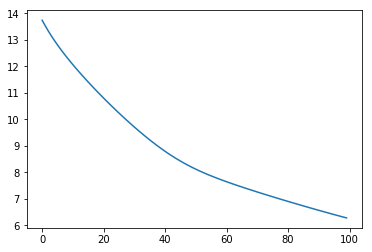

In [107]:
new,L=trainer(100);plt.plot(L);plt.show()


W declared
('Runs: ', 0, 'Loss: ', 3.1669703201349764, 'Acc', 0.4225932435071275)
('Runs: ', 1, 'Loss: ', 3.1668727593198165, 'Acc', 0.42278851786760396)
('Runs: ', 2, 'Loss: ', 3.166775224783253, 'Acc', 0.42278851786760396)
('Runs: ', 3, 'Loss: ', 3.166677716504961, 'Acc', 0.42278851786760396)
('Runs: ', 4, 'Loss: ', 3.166580234464643, 'Acc', 0.42278851786760396)
('Runs: ', 5, 'Loss: ', 3.166482778642026, 'Acc', 0.42278851786760396)
('Runs: ', 6, 'Loss: ', 3.1663853490168625, 'Acc', 0.42278851786760396)
('Runs: ', 7, 'Loss: ', 3.1662879455689277, 'Acc', 0.4229837922280804)
('Runs: ', 8, 'Loss: ', 3.166190568278025, 'Acc', 0.4231790665885569)
('Runs: ', 9, 'Loss: ', 3.166093217123981, 'Acc', 0.4231790665885569)
('Runs: ', 10, 'Loss: ', 3.165995892086648, 'Acc', 0.4231790665885569)
('Runs: ', 11, 'Loss: ', 3.1658985931459007, 'Acc', 0.4231790665885569)
('Runs: ', 12, 'Loss: ', 3.1658013202816435, 'Acc', 0.42337434094903337)
('Runs: ', 13, 'Loss: ', 3.1657040734738002, 'Acc', 0.423374340

('Runs: ', 116, 'Loss: ', 3.1558235662111795, 'Acc', 0.4243507127514157)
('Runs: ', 117, 'Loss: ', 3.155728924242201, 'Acc', 0.4243507127514157)
('Runs: ', 118, 'Loss: ', 3.155634306351965, 'Acc', 0.4243507127514157)
('Runs: ', 119, 'Loss: ', 3.155539712522806, 'Acc', 0.4243507127514157)
('Runs: ', 120, 'Loss: ', 3.1554451427370775, 'Acc', 0.4243507127514157)
('Runs: ', 121, 'Loss: ', 3.155350596977155, 'Acc', 0.4243507127514157)
('Runs: ', 122, 'Loss: ', 3.155256075225434, 'Acc', 0.4243507127514157)
('Runs: ', 123, 'Loss: ', 3.1551615774643307, 'Acc', 0.4243507127514157)
('Runs: ', 124, 'Loss: ', 3.155067103676284, 'Acc', 0.4243507127514157)
('Runs: ', 125, 'Loss: ', 3.1549726538437497, 'Acc', 0.4243507127514157)
('Runs: ', 126, 'Loss: ', 3.154878227949207, 'Acc', 0.4243507127514157)
('Runs: ', 127, 'Loss: ', 3.154783825975156, 'Acc', 0.4243507127514157)
('Runs: ', 128, 'Loss: ', 3.154689447904114, 'Acc', 0.4245459871118922)
('Runs: ', 129, 'Loss: ', 3.1545950937186236, 'Acc', 0.42454

('Runs: ', 233, 'Loss: ', 3.1449094073883685, 'Acc', 0.4264987307166569)
('Runs: ', 234, 'Loss: ', 3.1448174679202077, 'Acc', 0.4264987307166569)
('Runs: ', 235, 'Loss: ', 3.1447255505967098, 'Acc', 0.4264987307166569)
('Runs: ', 236, 'Loss: ', 3.14463365540243, 'Acc', 0.4264987307166569)
('Runs: ', 237, 'Loss: ', 3.1445417823219417, 'Acc', 0.42669400507713334)
('Runs: ', 238, 'Loss: ', 3.144449931339835, 'Acc', 0.42669400507713334)
('Runs: ', 239, 'Loss: ', 3.144358102440719, 'Acc', 0.4264987307166569)
('Runs: ', 240, 'Loss: ', 3.1442662956092184, 'Acc', 0.4264987307166569)
('Runs: ', 241, 'Loss: ', 3.1441745108299752, 'Acc', 0.4264987307166569)
('Runs: ', 242, 'Loss: ', 3.1440827480876505, 'Acc', 0.4264987307166569)
('Runs: ', 243, 'Loss: ', 3.1439910073669184, 'Acc', 0.4264987307166569)
('Runs: ', 244, 'Loss: ', 3.1438992886524746, 'Acc', 0.42669400507713334)
('Runs: ', 245, 'Loss: ', 3.143807591929029, 'Acc', 0.42669400507713334)
('Runs: ', 246, 'Loss: ', 3.1437159171813107, 'Acc',

('Runs: ', 348, 'Loss: ', 3.134477829306177, 'Acc', 0.42981839484475687)
('Runs: ', 349, 'Loss: ', 3.1343883393349907, 'Acc', 0.42981839484475687)
('Runs: ', 350, 'Loss: ', 3.1342988698396006, 'Acc', 0.42981839484475687)
('Runs: ', 351, 'Loss: ', 3.13420942080639, 'Acc', 0.42981839484475687)
('Runs: ', 352, 'Loss: ', 3.134119992221757, 'Acc', 0.42981839484475687)
('Runs: ', 353, 'Loss: ', 3.134030584072113, 'Acc', 0.42981839484475687)
('Runs: ', 354, 'Loss: ', 3.133941196343886, 'Acc', 0.42981839484475687)
('Runs: ', 355, 'Loss: ', 3.1338518290235164, 'Acc', 0.42981839484475687)
('Runs: ', 356, 'Loss: ', 3.1337624820974614, 'Acc', 0.42981839484475687)
('Runs: ', 357, 'Loss: ', 3.13367315555219, 'Acc', 0.42981839484475687)
('Runs: ', 358, 'Loss: ', 3.1335838493741877, 'Acc', 0.42981839484475687)
('Runs: ', 359, 'Loss: ', 3.1334945635499523, 'Acc', 0.42981839484475687)
('Runs: ', 360, 'Loss: ', 3.1334052980659983, 'Acc', 0.42981839484475687)
('Runs: ', 361, 'Loss: ', 3.133316052908854, '

('Runs: ', 462, 'Loss: ', 3.1244046769143705, 'Acc', 0.4329427846123804)
('Runs: ', 463, 'Loss: ', 3.124317436840137, 'Acc', 0.4329427846123804)
('Runs: ', 464, 'Loss: ', 3.1242302157782116, 'Acc', 0.4329427846123804)
('Runs: ', 465, 'Loss: ', 3.124143013716508, 'Acc', 0.4329427846123804)
('Runs: ', 466, 'Loss: ', 3.1240558306429507, 'Acc', 0.4329427846123804)
('Runs: ', 467, 'Loss: ', 3.123968666545478, 'Acc', 0.4329427846123804)
('Runs: ', 468, 'Loss: ', 3.123881521412039, 'Acc', 0.4329427846123804)
('Runs: ', 469, 'Loss: ', 3.1237943952305964, 'Acc', 0.4329427846123804)
('Runs: ', 470, 'Loss: ', 3.1237072879891246, 'Acc', 0.4329427846123804)
('Runs: ', 471, 'Loss: ', 3.12362019967561, 'Acc', 0.4329427846123804)
('Runs: ', 472, 'Loss: ', 3.1235331302780525, 'Acc', 0.4329427846123804)
('Runs: ', 473, 'Loss: ', 3.1234460797844625, 'Acc', 0.43313805897285684)
('Runs: ', 474, 'Loss: ', 3.123359048182864, 'Acc', 0.43313805897285684)
('Runs: ', 475, 'Loss: ', 3.1232720354612926, 'Acc', 0.4

('Runs: ', 577, 'Loss: ', 3.114493792440162, 'Acc', 0.4335286076938098)
('Runs: ', 578, 'Loss: ', 3.11440866248218, 'Acc', 0.4335286076938098)
('Runs: ', 579, 'Loss: ', 3.1143235502233004, 'Acc', 0.4335286076938098)
('Runs: ', 580, 'Loss: ', 3.114238455652746, 'Acc', 0.4335286076938098)
('Runs: ', 581, 'Loss: ', 3.114153378759754, 'Acc', 0.4335286076938098)
('Runs: ', 582, 'Loss: ', 3.114068319533571, 'Acc', 0.4335286076938098)
('Runs: ', 583, 'Loss: ', 3.113983277963453, 'Acc', 0.4335286076938098)
('Runs: ', 584, 'Loss: ', 3.1138982540386673, 'Acc', 0.4335286076938098)
('Runs: ', 585, 'Loss: ', 3.1138132477484914, 'Acc', 0.4335286076938098)
('Runs: ', 586, 'Loss: ', 3.1137282590822144, 'Acc', 0.4335286076938098)
('Runs: ', 587, 'Loss: ', 3.1136432880291345, 'Acc', 0.4335286076938098)
('Runs: ', 588, 'Loss: ', 3.11355833457856, 'Acc', 0.4335286076938098)
('Runs: ', 589, 'Loss: ', 3.113473398719811, 'Acc', 0.4335286076938098)
('Runs: ', 590, 'Loss: ', 3.113388480442217, 'Acc', 0.4335286

('Runs: ', 693, 'Loss: ', 3.10473411250094, 'Acc', 0.4339191564147627)
('Runs: ', 694, 'Loss: ', 3.104650966340647, 'Acc', 0.4339191564147627)
('Runs: ', 695, 'Loss: ', 3.1045678366963445, 'Acc', 0.4339191564147627)
('Runs: ', 696, 'Loss: ', 3.104484723558389, 'Acc', 0.4339191564147627)
('Runs: ', 697, 'Loss: ', 3.104401626917147, 'Acc', 0.43372388205428625)
('Runs: ', 698, 'Loss: ', 3.104318546762994, 'Acc', 0.43372388205428625)
('Runs: ', 699, 'Loss: ', 3.104235483086313, 'Acc', 0.43372388205428625)
('Runs: ', 700, 'Loss: ', 3.104152435877497, 'Acc', 0.43372388205428625)
('Runs: ', 701, 'Loss: ', 3.104069405126949, 'Acc', 0.43372388205428625)
('Runs: ', 702, 'Loss: ', 3.10398639082508, 'Acc', 0.43372388205428625)
('Runs: ', 703, 'Loss: ', 3.103903392962308, 'Acc', 0.43372388205428625)
('Runs: ', 704, 'Loss: ', 3.103820411529065, 'Acc', 0.43372388205428625)
('Runs: ', 705, 'Loss: ', 3.103737446515786, 'Acc', 0.43372388205428625)
('Runs: ', 706, 'Loss: ', 3.103654497912918, 'Acc', 0.43

('Runs: ', 810, 'Loss: ', 3.0951156458145443, 'Acc', 0.43567662565905096)
('Runs: ', 811, 'Loss: ', 3.0950343688511968, 'Acc', 0.43567662565905096)
('Runs: ', 812, 'Loss: ', 3.0949531073339296, 'Acc', 0.43567662565905096)
('Runs: ', 813, 'Loss: ', 3.094871861254081, 'Acc', 0.43567662565905096)
('Runs: ', 814, 'Loss: ', 3.094790630602996, 'Acc', 0.4358719000195274)
('Runs: ', 815, 'Loss: ', 3.094709415372031, 'Acc', 0.4358719000195274)
('Runs: ', 816, 'Loss: ', 3.0946282155525426, 'Acc', 0.4358719000195274)
('Runs: ', 817, 'Loss: ', 3.094547031135903, 'Acc', 0.4358719000195274)
('Runs: ', 818, 'Loss: ', 3.0944658621134886, 'Acc', 0.4358719000195274)
('Runs: ', 819, 'Loss: ', 3.094384708476683, 'Acc', 0.4358719000195274)
('Runs: ', 820, 'Loss: ', 3.0943035702168795, 'Acc', 0.4358719000195274)
('Runs: ', 821, 'Loss: ', 3.0942224473254765, 'Acc', 0.4358719000195274)
('Runs: ', 822, 'Loss: ', 3.0941413397938833, 'Acc', 0.4358719000195274)
('Runs: ', 823, 'Loss: ', 3.0940602476135144, 'Acc',

('Runs: ', 926, 'Loss: ', 3.085788402107437, 'Acc', 0.4372388205428627)
('Runs: ', 927, 'Loss: ', 3.0857088610173777, 'Acc', 0.4372388205428627)
('Runs: ', 928, 'Loss: ', 3.0856293344181127, 'Acc', 0.4372388205428627)
('Runs: ', 929, 'Loss: ', 3.085549822301821, 'Acc', 0.4372388205428627)
('Runs: ', 930, 'Loss: ', 3.0854703246606907, 'Acc', 0.4372388205428627)
('Runs: ', 931, 'Loss: ', 3.0853908414869116, 'Acc', 0.4372388205428627)
('Runs: ', 932, 'Loss: ', 3.0853113727726837, 'Acc', 0.4372388205428627)
('Runs: ', 933, 'Loss: ', 3.085231918510213, 'Acc', 0.4372388205428627)
('Runs: ', 934, 'Loss: ', 3.085152478691712, 'Acc', 0.4372388205428627)
('Runs: ', 935, 'Loss: ', 3.0850730533094, 'Acc', 0.4372388205428627)
('Runs: ', 936, 'Loss: ', 3.0849936423555038, 'Acc', 0.4372388205428627)
('Runs: ', 937, 'Loss: ', 3.0849142458222554, 'Acc', 0.4372388205428627)
('Runs: ', 938, 'Loss: ', 3.084834863701894, 'Acc', 0.4372388205428627)
('Runs: ', 939, 'Loss: ', 3.0847554959866663, 'Acc', 0.4372

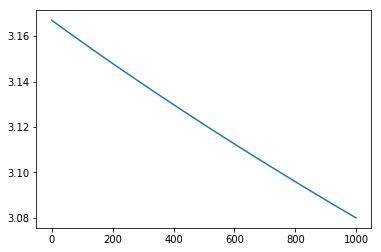

In [118]:
new,L=trainer(1000,w=new);plt.plot(L);plt.show()

In [119]:
tester(test_x,one_test,test_y,new)

('Test Loss: ', 1.6498243413368716)
((5128, 16), (5128, 16))
(array([13, 10, 10, ...,  7, 10,  1]), array([ 1,  2,  3,  4,  5,  7,  9, 10, 11, 12, 13, 14]))
[ 6 12  3 ...  8 11  2]
0.497094383775351


1.6498243413368716